In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file into a DataFrame
combined_season_data = pd.read_csv('combined_season_data.csv')

# Display the first few rows of the DataFrame
combined_season_data.head()

,Unnamed: 0,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HY,AY,HR,AR,HAGR,AAGR,HAGCR,AAGCR,NAGR,NAGCR
0,0,2002-2003,17/08/2002,Blackburn,Sunderland,0.0,0.0,D,0.0,0.0,...,1.0,2.0,0.0,0.0,0.882324,0.750135,0.990630,1.145987,0.816229,1.068309
1,1,2002-2003,17/08/2002,Charlton,Chelsea,2.0,3.0,A,2.0,1.0,...,0.0,3.0,1.0,0.0,0.861645,1.372106,1.167044,0.664697,1.116875,0.915870
2,2,2002-2003,17/08/2002,Everton,Tottenham,2.0,2.0,D,1.0,0.0,...,1.0,1.0,0.0,0.0,1.012637,1.217017,0.939149,0.914164,1.114827,0.926656
3,3,2002-2003,17/08/2002,Fulham,Bolton,4.0,1.0,H,3.0,1.0,...,1.0,2.0,0.0,0.0,0.896110,0.873021,1.133872,1.109798,0.884566,1.121835
4,4,2002-2003,17/08/2002,Leeds,Man City,3.0,0.0,H,2.0,0.0,...,1.0,1.0,0.0,0.0,0.847858,1.391492,1.384168,0.761530,1.119675,1.072849


## Competitiveness Measures
   4. C5 ratio and C5ICB</br>
     i) Points</br>
    ii) Strength</br>


In [3]:
df = combined_season_data.copy()
# Calculating points for home and away teams in each match
df['HomePoints'] = df.apply(lambda row: 3 if row['FTR'] == 'H' else 1 if row['FTR'] == 'D' else 0, axis=1)
df['AwayPoints'] = df.apply(lambda row: 3 if row['FTR'] == 'A' else 1 if row['FTR'] == 'D' else 0, axis=1)

# Creating a dataframe for home teams
home_df = df[['Season', 'HomeTeam', 'HomePoints']]
home_df.columns = ['Season', 'Team', 'Points']

# Creating a dataframe for away teams
away_df = df[['Season', 'AwayTeam', 'AwayPoints']]
away_df.columns = ['Season', 'Team', 'Points']

# Combining home and away dataframes
combined_df = pd.concat([home_df, away_df])

# Grouping by season and team to get the sum of points for each team in each season
season_team_points = combined_df.groupby(['Season', 'Team'])['Points'].sum().reset_index()

# Sorting values by season and points to get top teams
season_team_points_sorted = season_team_points.sort_values(by=['Season', 'Points'], ascending=[True, False])

# Getting the top 5 teams for each season
top_5_teams_each_season = season_team_points_sorted.groupby('Season').head(5)

# Calculating total points by top 5 teams each season
top_5_points = top_5_teams_each_season.groupby('Season')['Points'].sum()

# Calculating total points by all teams each season
total_points = season_team_points.groupby('Season')['Points'].sum()

# Calculating C5 Ratio
c5_ratio = top_5_points / total_points

# Calculating C5ICB
N = season_team_points['Team'].nunique()
c5_icb = (c5_ratio / (5/N)) * 100

# Combining the results
c5_results = pd.concat([c5_ratio, c5_icb], axis=1)
c5_results.columns = ['C5 Ratio', 'C5ICB']
c5_results.reset_index(inplace=True)
c5_results



,Season,C5 Ratio,C5ICB
0,2002-2003,0.343810,288.800000
1,2003-2004,0.348837,293.023256
2,2004-2005,0.363107,305.009709
3,2005-2006,0.365005,306.603951
4,2006-2007,0.353167,296.660269
5,2007-2008,0.380769,319.846154
6,2008-2009,0.377756,317.315436
7,2009-2010,0.366858,308.160920
8,2010-2011,0.342080,287.346939
9,2011-2012,0.364852,306.475645


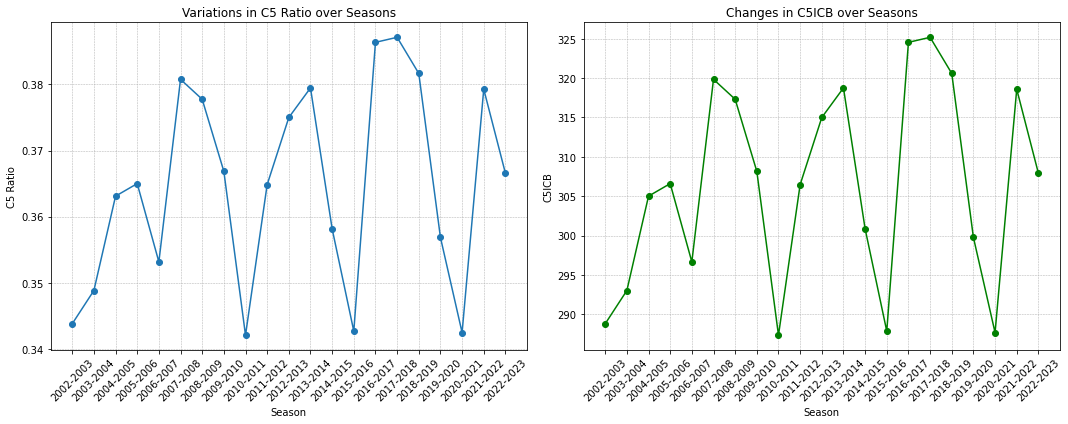

In [4]:
import matplotlib.pyplot as plt

# Plotting the variations in C5 Ratio and C5ICB over the seasons
plt.figure(figsize=(15,6))

# Plotting C5 Ratio
plt.subplot(1, 2, 1)
plt.plot(c5_results['Season'], c5_results['C5 Ratio'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Variations in C5 Ratio over Seasons')
plt.ylabel('C5 Ratio')
plt.xlabel('Season')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Plotting C5ICB
plt.subplot(1, 2, 2)
plt.plot(c5_results['Season'], c5_results['C5ICB'], marker='o', linestyle='-', color='green')
plt.xticks(rotation=45)
plt.title('Changes in C5ICB over Seasons')
plt.ylabel('C5ICB')
plt.xlabel('Season')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Adjust layout
plt.tight_layout()
plt.show()


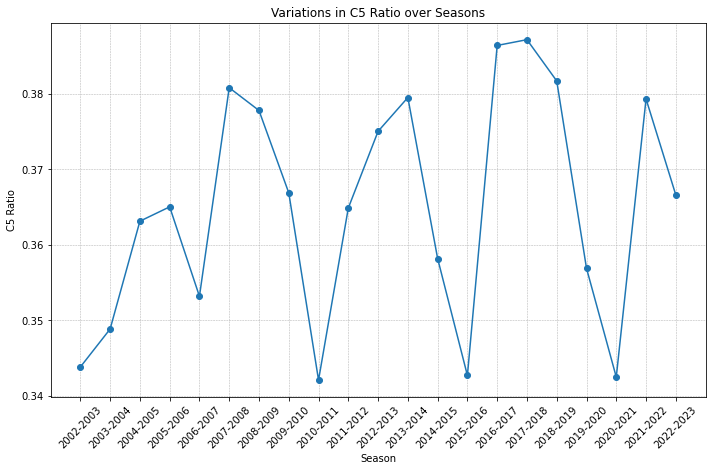

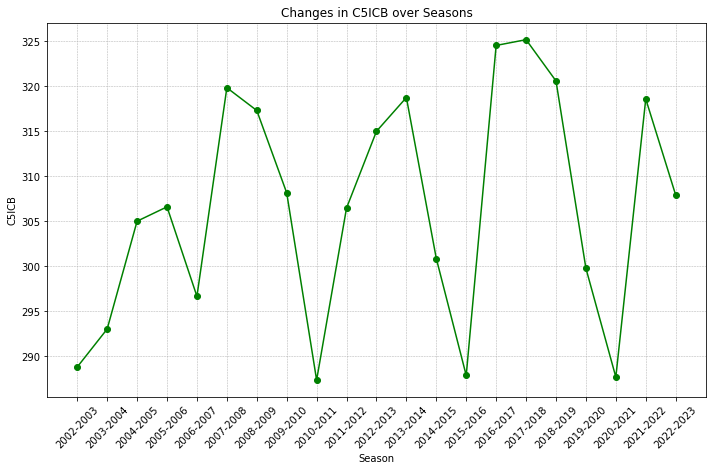

In [7]:
import matplotlib.pyplot as plt

# Adjust the figure size to better fit vertically stacked plots
plt.figure(figsize=(10, 12))

# Plotting C5 Ratio
plt.subplot(2, 1, 1) # Change this line to stack plots vertically
plt.plot(c5_results['Season'], c5_results['C5 Ratio'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Variations in C5 Ratio over Seasons')
plt.ylabel('C5 Ratio')
plt.xlabel('Season')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Save the plot as a PDF
file_path = "C:/Users/HP/Desktop/DissertationPrograms/Final_Work/Images/pdf/C5.pdf"
plt.savefig(file_path)
# Adjust layout
plt.tight_layout()
plt.show()

# Plotting C5ICB
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 2) # Change this line to stack plots vertically
plt.plot(c5_results['Season'], c5_results['C5ICB'], marker='o', linestyle='-', color='green')
plt.xticks(rotation=45)
plt.title('Changes in C5ICB over Seasons')
plt.ylabel('C5ICB')
plt.xlabel('Season')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Save the plot as a PDF
file_path = "C:/Users/HP/Desktop/DissertationPrograms/Final_Work/Images/pdf/C5ICB.pdf"
plt.savefig(file_path)

# Adjust layout
plt.tight_layout()
plt.show()


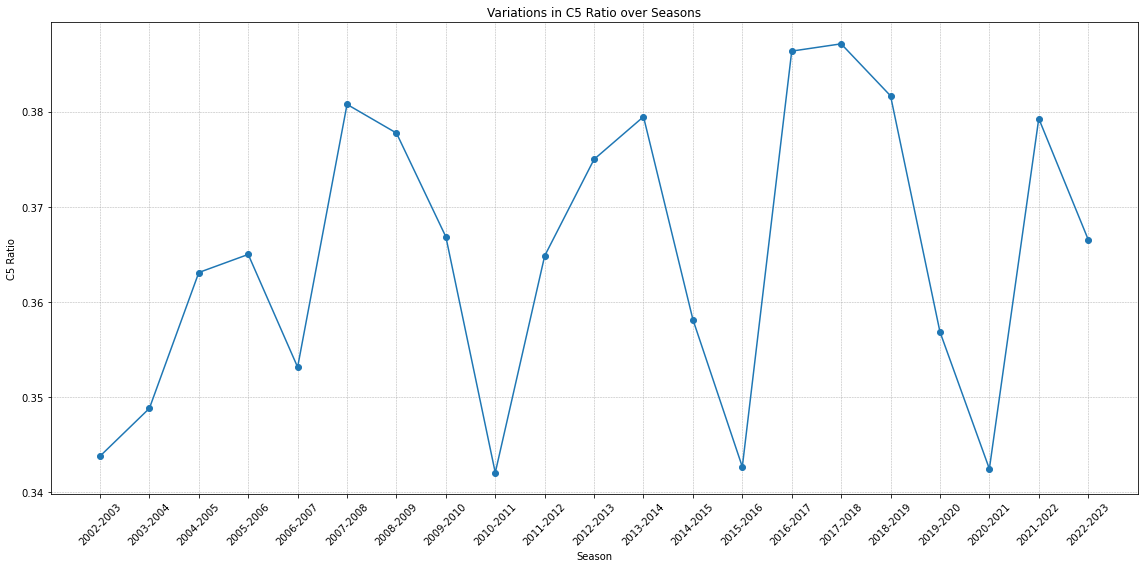

In [8]:
import matplotlib.pyplot as plt

# Adjust the figure size to better fit vertically stacked plots
plt.figure(figsize=(16, 8))

# Plotting C5 Ratio

plt.plot(c5_results['Season'], c5_results['C5 Ratio'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Variations in C5 Ratio over Seasons')
plt.ylabel('C5 Ratio')
plt.xlabel('Season')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Save the plot as a PDF
file_path = "C:/Users/HP/Desktop/DissertationPrograms/Final_Work/Images/pdf/C5.pdf"
plt.savefig(file_path)
# Adjust layout
plt.tight_layout()
plt.show()

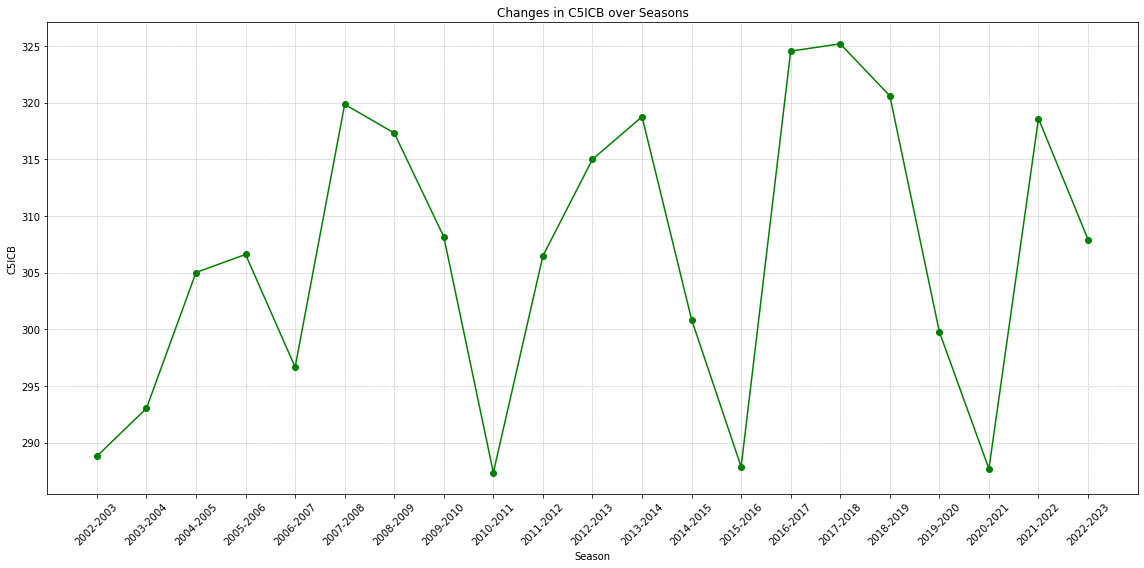

In [9]:
# Plotting C5ICB
plt.figure(figsize=(16, 8))
plt.plot(c5_results['Season'], c5_results['C5ICB'], marker='o', linestyle='-', color='green')
plt.xticks(rotation=45)
plt.title('Changes in C5ICB over Seasons')
plt.ylabel('C5ICB')
plt.xlabel('Season')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Save the plot as a PDF
file_path = "C:/Users/HP/Desktop/DissertationPrograms/Final_Work/Images/pdf/C5ICB.pdf"
plt.savefig(file_path)

# Adjust layout
plt.tight_layout()
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression


# For C5 Ratio: Lower values indicate more competitiveness.
# For C5ICB: Lower values indicate more competitiveness.

# 1. Most Competitive Year for C5 Ratio
most_competitive_year_c5 = c5_results['Season'][c5_results['C5 Ratio'].idxmin()]

# Least Competitive Year for C5 Ratio
least_competitive_year_c5 = c5_results['Season'][c5_results['C5 Ratio'].idxmax()]

# Current Trend of Competitiveness Balance for C5 Ratio
recent_years = 5  # Last 5 seasons
recent_trend_c5 = c5_results['C5 Ratio'].tail(recent_years).values
if recent_trend_c5[-1] < recent_trend_c5[0]:
    current_trend_c5 = "Increasing"
elif recent_trend_c5[-1] > recent_trend_c5[0]:
    current_trend_c5 = "Declining"
else:
    current_trend_c5 = "Stable"

# Future Trend of Competitiveness Balance for C5 Ratio
X_c5 = np.array(range(len(c5_results) - recent_years, len(c5_results))).reshape(-1, 1)
y_c5 = c5_results['C5 Ratio'].tail(recent_years).values
model_c5 = LinearRegression().fit(X_c5, y_c5)
predicted_value_c5 = model_c5.predict([[len(c5_results)]])

if predicted_value_c5 < y_c5[-1]:
    future_trend_c5 = "Increasing"
elif predicted_value_c5 > y_c5[-1]:
    future_trend_c5 = "Declining"
else:
    future_trend_c5 = "Stable"

# 1. Most Competitive Year for C5ICB
most_competitive_year_c5icb = c5_results['Season'][c5_results['C5ICB'].idxmin()]

# Least Competitive Year for C5ICB
least_competitive_year_c5icb = c5_results['Season'][c5_results['C5ICB'].idxmax()]

# Current Trend of Competitiveness Balance for C5ICB
recent_trend_c5icb = c5_results['C5ICB'].tail(recent_years).values
if recent_trend_c5icb[-1] < recent_trend_c5icb[0]:
    current_trend_c5icb = "Increasing"
elif recent_trend_c5icb[-1] > recent_trend_c5icb[0]:
    current_trend_c5icb = "Declining"
else:
    current_trend_c5icb = "Stable"

# Future Trend of Competitiveness Balance for C5ICB
X_c5icb = np.array(range(len(c5_results) - recent_years, len(c5_results))).reshape(-1, 1)
y_c5icb = c5_results['C5ICB'].tail(recent_years).values
model_c5icb = LinearRegression().fit(X_c5icb, y_c5icb)
predicted_value_c5icb = model_c5icb.predict([[len(c5_results)]])

if predicted_value_c5icb < y_c5icb[-1]:
    future_trend_c5icb = "Increasing"
elif predicted_value_c5icb > y_c5icb[-1]:
    future_trend_c5icb = "Declining"
else:
    future_trend_c5icb = "Stable"

(most_competitive_year_c5, least_competitive_year_c5, current_trend_c5, future_trend_c5,
 most_competitive_year_c5icb, least_competitive_year_c5icb, current_trend_c5icb, future_trend_c5icb)


('2010-2011',
 '2017-2018',
 'Increasing',
 'Increasing',
 '2010-2011',
 '2017-2018',
 'Increasing',
 'Increasing')